## Analyzing the Relationship Between GDP and Life Expectancy

## Overview:
This project analyzes the relationship between GDP and life expectancy across six nations (Chile, China, Germany, Mexico, United States of America, and Zimbabwe). The data is from 2000 to 2015 and from the World Health Organization and the World Bank. The analysis includes various statistical techniques and visualizations to provide insights into how these two variables interact over time and across different countries.

## Goals:
- To investigate trends in life expectancy and GDP over time.
- To explore the correlation between GDP and life expectancy.
- To provide insights and recommendations for policymakers on how economic growth might influence public health.

## Types of Analysis and Charts Explored:
### Exploratory Data Analysis
- Line plots for trend analysis.
- Scatter plots for correlation analysis.
- Bar plots for comparing averages.
- Violin plots for distribution analysis.

### Advanced Statistical Analysis
* Probability distribution of life expectancy trends and policy implications.
* Law of large numbers plot for comparing averages of life expectancy.
* Conditional probability analysis for correlating between GDP and life expectancy.
* Central Limit Theorem for comparing distributions of life expectancy.
* One-sample and two-sample t-tests to compare the statistical significance between life expectancies.
* Swarm plots to compare distributions of GDP by country.

## Step 1: Data Cleaning and Preprocessing

First, we will load the dataset and perform necessary preprocessing steps, such as handling missing values and converting GDP to trillions for better readability. This ensures our data is clean and ready for analysis, minimizing potential biases or errors.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from scipy import stats


# Load the dataset
data = pd.read_csv('all_data.csv')

# Display the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.info())

# remove unnecessary warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
<class 'panda

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Drop rows with missing values (if any)
data_clean = data.dropna()

# Convert Year to datetime
data_clean['Year'] = pd.to_datetime(data_clean['Year'], format='%Y')

# Adjusting the GDP values to be in trillions for better visualization
data_clean['GDP_Trillions'] = data_clean['GDP'] / 1e12

# Replace infinite values with NaN
data_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


## Step 2: Exploratory Data Analysis (EDA)

### Life Expectancy Trends and Policy Implications

**Purpose**: To analyze how life expectancy has changed over time in the six nations. This helps us understand the impact of healthcare policies and socio-economic factors on public health.

**Visual Explanation**: The line plot below shows the trends in life expectancy for each country over time, allowing us to compare the progression and identify any notable changes or patterns.

**Analysis**:
1. All countries show an overall increasing trend in life expectancy from 2000 to 2015.
2. Zimbabwe stands out with the lowest life expectancy but shows the most dramatic improvement over the period.
3. Germany, Chile, and the USA maintain the highest life expectancies throughout the period.
4. China shows a steady and significant increase in life expectancy.
5. Mexico's life expectancy increase is more gradual compared to other countries.

**Policy Implications**:
1. Investigate the factors behind Zimbabwe's rapid improvement for potential application in other developing nations.
2. Assess the effectiveness of health policies in countries with steady improvements like China.
3. For countries with slower growth rates, like Mexico, consider targeted health interventions to accelerate improvement.

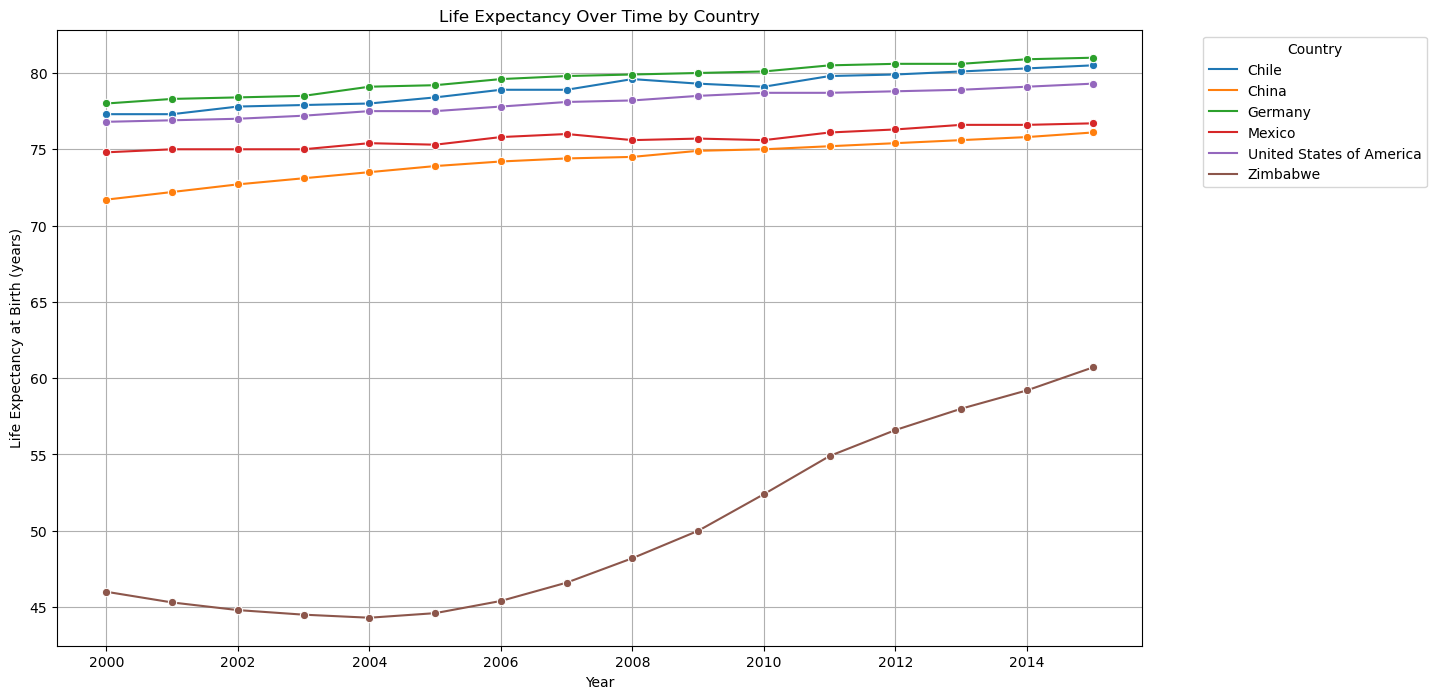

In [19]:
# Trends in life expectancy over time by country
# remove unnecessary warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data_clean, x='Year', y='Life expectancy at birth (years)', hue='Country', marker='o')
    plt.title('Life Expectancy Over Time by Country')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy at Birth (years)')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

## GDP Trends and Economic Policies

**Purpose**: To examine the trends in GDP over time for the six nations. This analysis helps in understanding the economic growth and stability of each country.

**Visual Explanation**: The line plot illustrates the GDP trends for each country over the years, highlighting economic growth patterns and allowing for comparison between nations.

**Analysis**:
1. The United States consistently has the highest GDP, showing steady growth over the period.
2. China demonstrates the most dramatic economic growth, overtaking Germany around 2007.
3. Germany shows steady growth with some fluctuations, particularly around 2009 (likely due to the global financial crisis).
4. Chile, Mexico, and Zimbabwe have significantly lower GDPs compared to the other countries, with relatively stable trends.

**Policy Implications**:
1. Investigate the factors behind China's rapid economic growth for potential lessons for other developing economies.
2. Assess the impact of economic policies in countries with steady growth, like the USA and Germany.
3. For countries with lower GDP, consider targeted economic policies to stimulate growth and development.

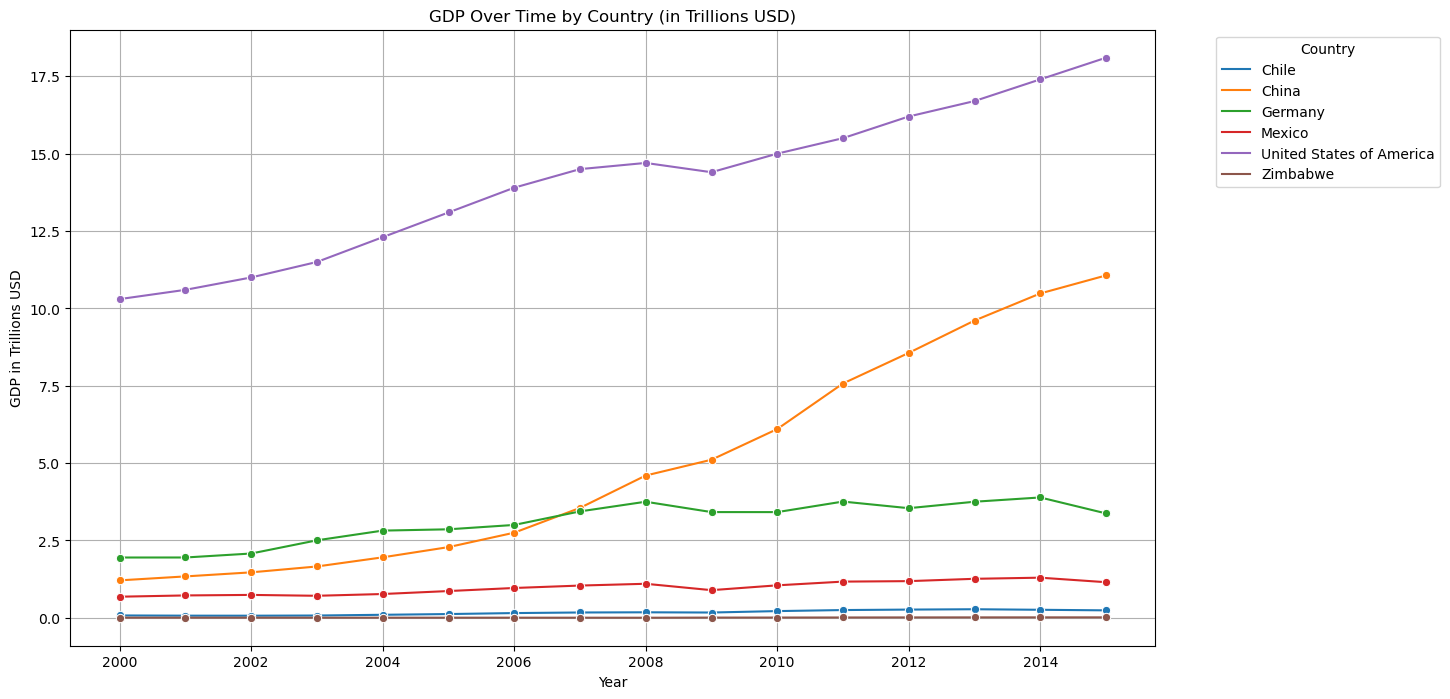

In [21]:
# Fit linear regression models for each country to analyze the trend in GDP
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data_clean, x='Year', y='GDP_Trillions', hue='Country', marker='o')
    plt.title('GDP Over Time by Country (in Trillions USD)')
    plt.xlabel('Year')
    plt.ylabel('GDP in Trillions USD')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

### Correlation Between GDP and Life Expectancy

**Purpose**: To investigate the relationship between GDP and life expectancy to determine if higher economic output is associated with better health outcomes.

**Visual Explanation**: The scatter plots show the relationship between GDP and life expectancy for each country, highlighting any correlations and differences between nations.

**Analysis**:
1. Most countries show a positive correlation between GDP and life expectancy.
2. The relationship appears to be strongest for China and Zimbabwe, where increases in GDP correspond to notable increases in life expectancy.
3. For developed countries like the USA and Germany, the relationship seems to plateau, suggesting diminishing returns of GDP on life expectancy at higher levels of development.
4. Chile and Mexico show positive but more scattered relationships.

**Policy Implications**:
1. For developing countries, policies that promote economic growth may have significant positive impacts on life expectancy.
2. For developed countries, focus on targeted health interventions rather than relying solely on economic growth to improve life expectancy.
3. Consider country-specific factors that might influence the GDP-life expectancy relationship when designing policies.

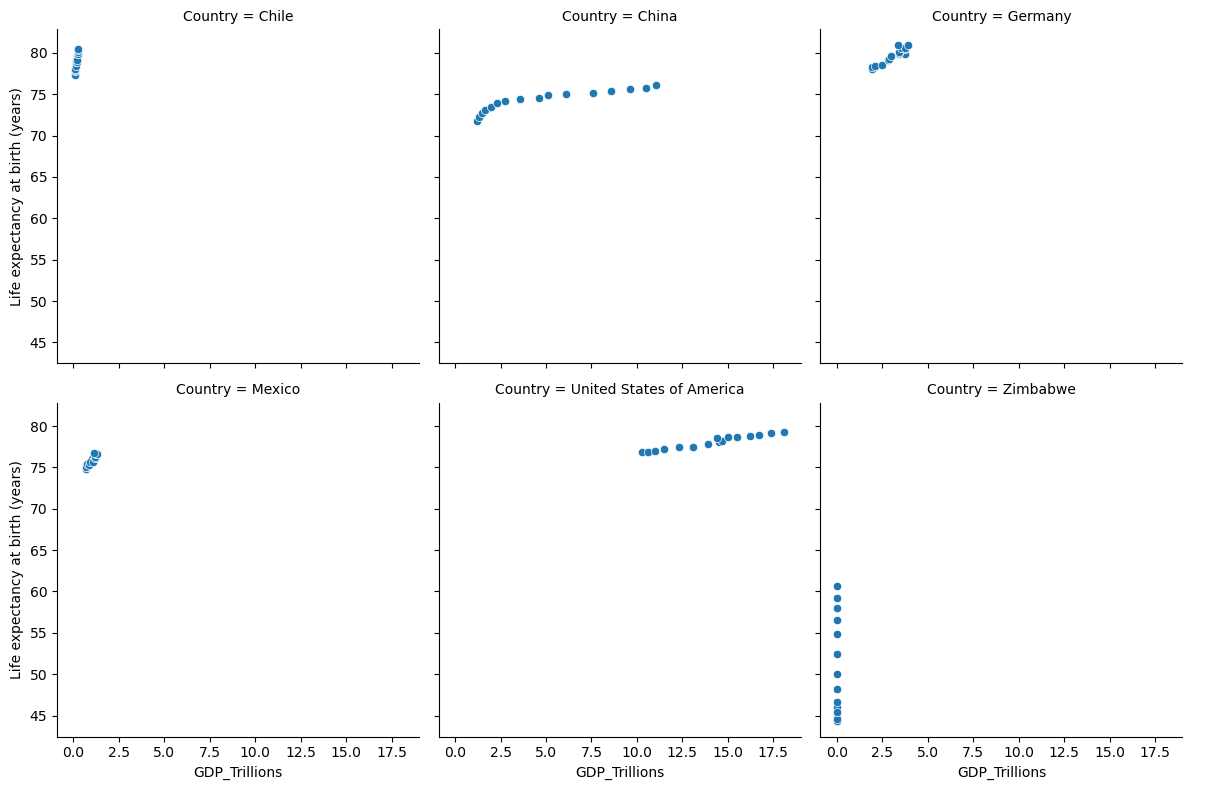

In [26]:
# Calculate between GDP and Life Expectancy
g = sns.FacetGrid(data_clean, col="Country", col_wrap=3, height=4)
g.map(sns.scatterplot, "GDP_Trillions", "Life expectancy at birth (years)")
g.add_legend()
plt.show()

### Average Life Expectancy

**Purpose**: To compare the average life expectancy across the six nations. This helps in identifying differences and similarities in health outcomes between countries.

**Visual Explanation**: The bar plot shows the average life expectancy for each country, providing a clear comparison of health outcomes.

**Analysis**:
1. Germany has the highest average life expectancy, followed closely by Chile.
2. The USA, China, and Mexico form a middle group with similar average life expectancies.
3. Zimbabwe has a significantly lower average life expectancy compared to the other countries.

**Policy Implications**:
1. Investigate the healthcare systems and policies of Germany and Chile for potential best practices.
2. For countries in the middle group, focus on targeted interventions to close the gap with the top-performing countries.
3. Prioritize comprehensive health and development policies for Zimbabwe to address the significant disparity in life expectancy.

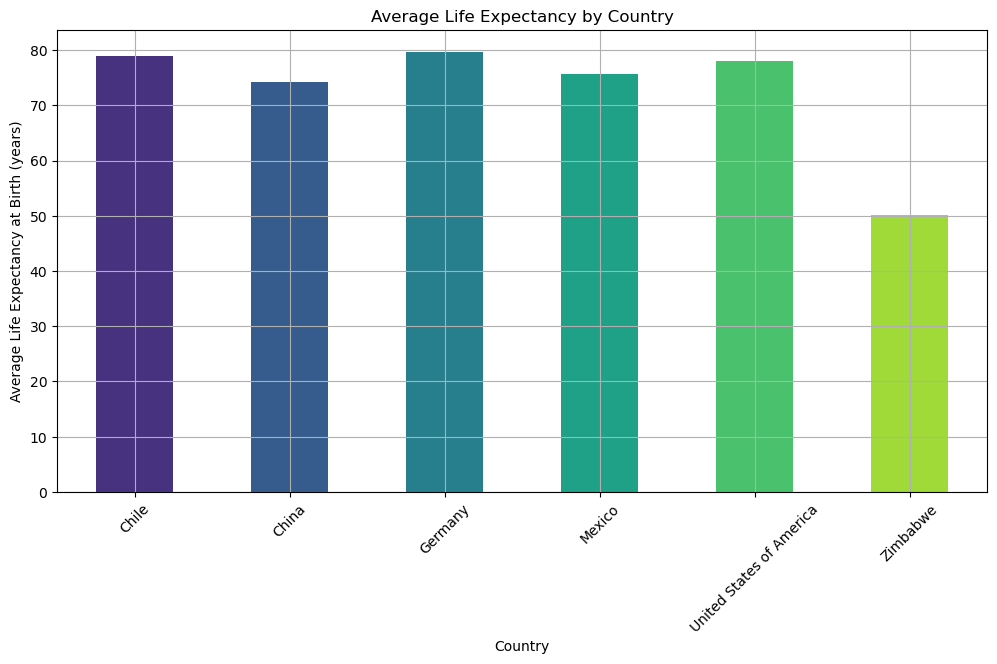

In [23]:
# Average life expectancy for each country
average_life_expectancy = data_clean.groupby('Country')['Life expectancy at birth (years)'].mean()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(12, 6))
    average_life_expectancy.plot(kind='bar', color=sns.color_palette('viridis', len(average_life_expectancy)))
    plt.title('Average Life Expectancy by Country')
    plt.xlabel('Country')
    plt.ylabel('Average Life Expectancy at Birth (years)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Distribution of Life Expectancy

**Purpose**: To examine the variation in life expectancy within each country over the study period.

**Visual Explanation**: The violin plot shows the distribution of life expectancy for each country, providing insights into the range and central tendencies of life expectancy values.

**Analysis**:
1. Germany and Chile show high median life expectancies with relatively narrow distributions, indicating consistently high life expectancy over the study period.
2. The USA and Mexico have similar median life expectancies but with wider distributions, suggesting more variability over time.
3. China shows a wide distribution, reflecting the significant improvement in life expectancy over the study period.
4. Zimbabwe has the lowest median life expectancy but the widest distribution, indicating substantial changes over time.

**Policy Implications**:
1. For countries with narrow distributions (Germany, Chile), focus on maintaining and incrementally improving existing health policies.
2. For countries with wider distributions (USA, Mexico), investigate factors causing variability and aim for more consistent health outcomes.
3. For China and Zimbabwe, continue policies that have driven improvements while addressing factors that contribute to lower life expectancies.

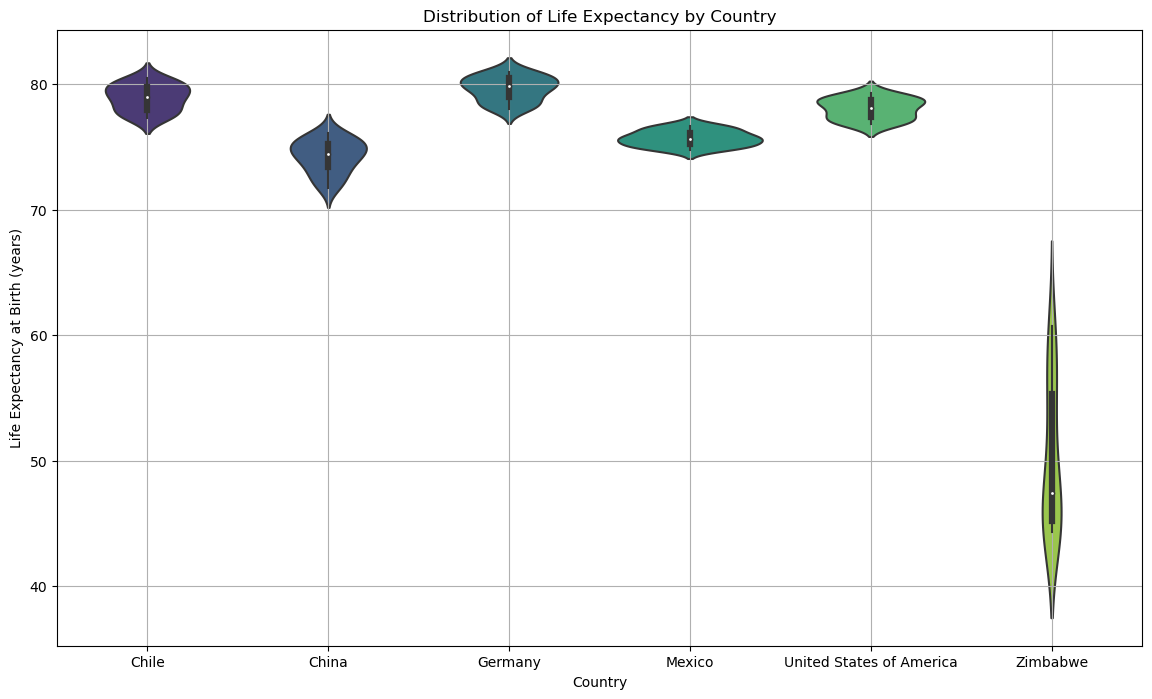

In [25]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=data_clean, x='Country', y='Life expectancy at birth (years)', palette='viridis')
plt.title('Distribution of Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth (years)')
plt.grid(True)
plt.show()

## Conclusions (EDA):

1. There is a general positive relationship between GDP and life expectancy across all countries, but the strength of this relationship varies.
2. Economic growth seems to have a more pronounced effect on life expectancy in developing countries.
3. Developed countries show signs of diminishing returns in life expectancy gains from GDP growth.
4. There are significant disparities in both GDP and life expectancy among the studied countries, with Zimbabwe showing the most room for improvement.
5. China demonstrates remarkable progress in both economic growth and life expectancy improvement over the study period.
6. The distribution of life expectancy within countries varies, with some showing consistent outcomes (Germany, Chile) and others exhibiting wider variability (USA, Mexico).
7. The United States maintains the highest GDP throughout, while China shows the most dramatic economic growth.
8. The rate of life expectancy improvement differs among countries, suggesting varying effectiveness of health and economic policies.

## Recommendations for Policymakers (EDA):

1. Tailor health and economic policies to each country's specific situation, considering their position on the GDP-life expectancy curve.
2. For developing countries, focus on policies that promote both economic growth and public health improvements, such as:
   - Investing in basic healthcare infrastructure and disease prevention programs
   - Implementing inclusive economic growth strategies
3. For developed countries, prioritize targeted health interventions to address specific challenges, including:
   - Focusing on lifestyle-related health issues and preventive care
   - Addressing healthcare affordability and accessibility to reduce outcome variability
4. Investigate and potentially adapt successful policies from countries showing consistent high performance or significant improvements, such as:
   - Studying factors behind China's rapid progress in both GDP and life expectancy
   - Examining Germany and Chile's approaches to maintaining consistently high life expectancies
5. Consider holistic approaches that address both economic and social determinants of health to maximize improvements in life expectancy, including:
   - Implementing policies that target education, environmental health, and social equality
   - Developing inter-ministerial task forces to ensure coordinated efforts across government departments
6. Invest in robust data collection and analysis capabilities to inform policy decisions and monitor outcomes effectively.
7. Develop long-term health and economic plans that account for demographic shifts and future challenges.
8. Strengthen international cooperation mechanisms to support countries like Zimbabwe that have shown improvement but still lag behind.
9. For countries with wider life expectancy distributions, investigate factors causing variability and aim for more consistent health outcomes across the population.
10. Balance economic growth policies with targeted health interventions, recognizing that the relationship between GDP and life expectancy may vary at different stages of development.

## Advanced Statistical Methods and Visualizations
## 1. Probability Distribution of Life Expectancy

**Purpose**: To visualize the probability distribution of life expectancy for each country. This helps in understanding the spread and central tendency of life expectancy data.

**Visual Explanation**: The histograms show the distribution of life expectancy for each country, providing insights into the variability and skewness of the data.

**Analysis**:
1. Germany and Chile show relatively symmetric distributions with high mean life expectancies.
2. The United States and Mexico have slightly left-skewed distributions, indicating a tendency towards higher life expectancies.
3. China's distribution is more spread out, reflecting the significant improvements in life expectancy over the study period.
4. Zimbabwe shows a bimodal distribution, suggesting two distinct periods of life expectancy levels, likely due to rapid improvements over time.

**Implications**:
- Policy makers should consider the shape of these distributions when setting health targets.
- For countries with wider distributions, like China and Zimbabwe, policies should aim to reduce variability and improve consistency in health outcomes.
- Countries with narrower distributions, like Germany and Chile, may focus on incremental improvements and maintaining their high standards.

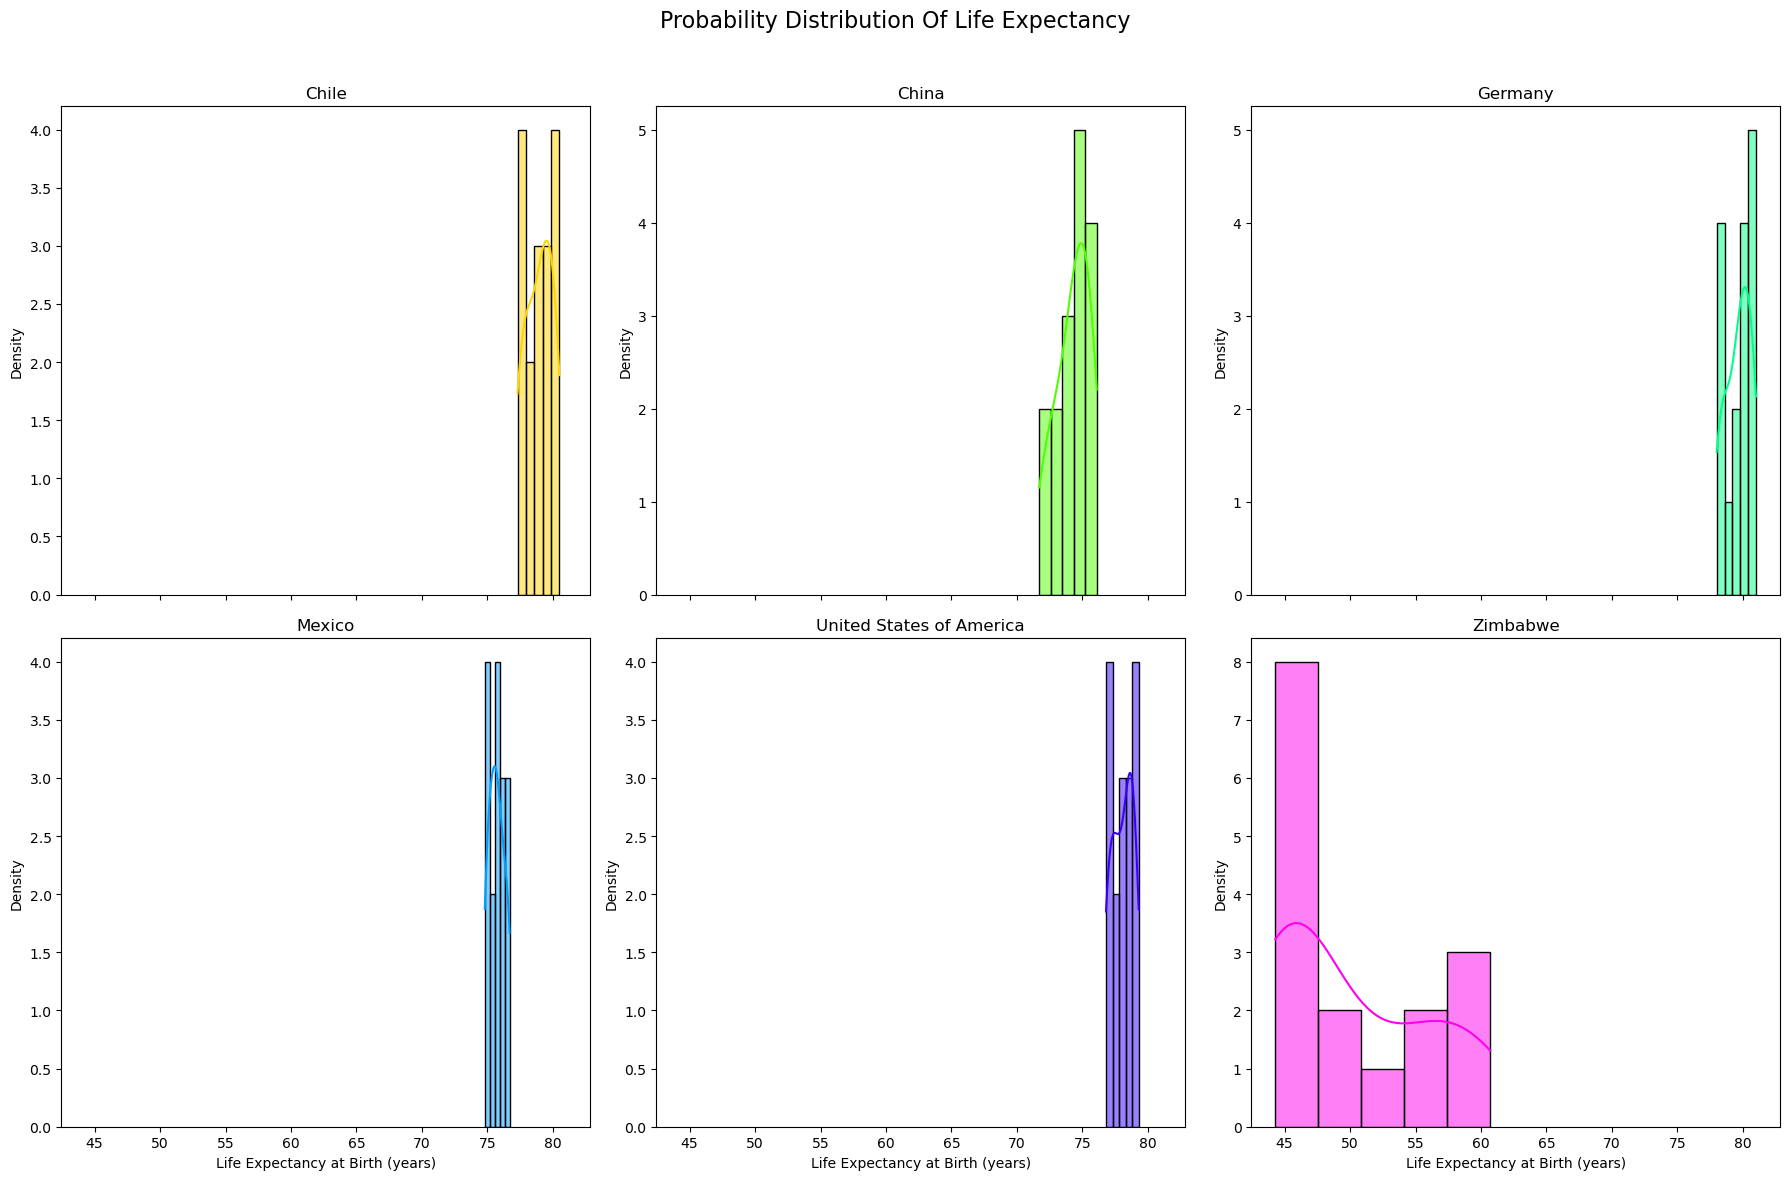

<Figure size 640x480 with 0 Axes>

In [31]:
# Histograms to visualize the probability distribution of life expectancy by country
countries = data_clean['Country'].unique()
colors = sns.color_palette('hsv', len(countries))

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True)
axes = axes.flatten()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for i, country in enumerate(countries):
        country_data = data_clean[data_clean['Country'] == country]
        sns.histplot(country_data['Life expectancy at birth (years)'], kde=True, ax=axes[i], color=colors[i])
        axes[i].set_title(country)
        axes[i].set_xlabel('Life Expectancy at Birth (years)')
        axes[i].set_ylabel('Density')

fig.suptitle('Probability Distribution Of Life Expectancy', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
plt.clf()

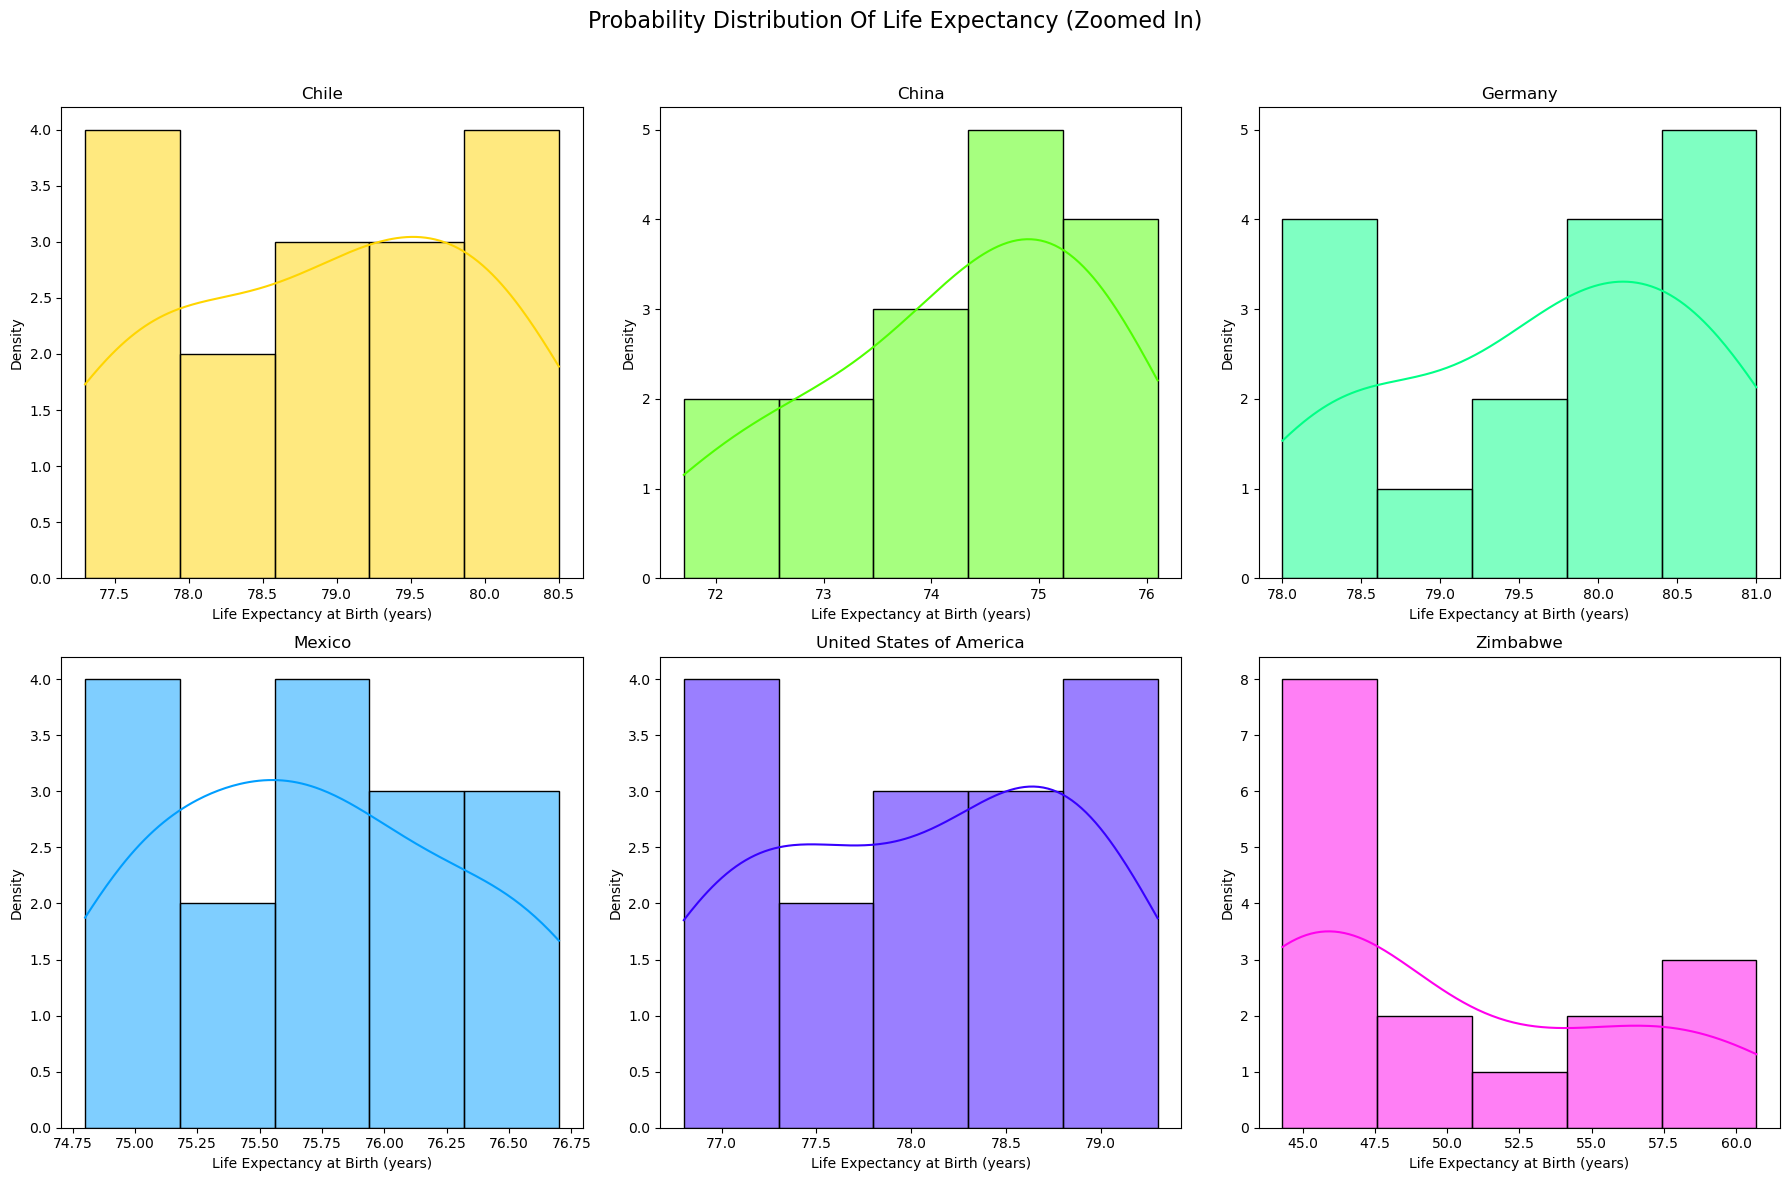

<Figure size 640x480 with 0 Axes>

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for i, country in enumerate(countries):
        country_data = data_clean[data_clean['Country'] == country]
        sns.histplot(country_data['Life expectancy at birth (years)'], kde=True, ax=axes[i], color=colors[i])
        axes[i].set_title(country)
        axes[i].set_xlabel('Life Expectancy at Birth (years)')
        axes[i].set_ylabel('Density')

fig.suptitle('Probability Distribution Of Life Expectancy (Zoomed In)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
plt.clf()

## 2. Law of Large Numbers

**Purpose**: To demonstrate how sample means converge to the population mean as sample size increases, validating the reliability of our statistical inferences.

**Visual Explanation**: The plot shows how the sample mean of life expectancy converges to the population mean as the sample size increases.

**Analysis**:
1. As the sample size increases, the sample mean converges to the population mean for all countries.
2. The convergence is faster for countries with less variability in life expectancy (e.g., Germany, Chile).
3. Countries with more variability (e.g., Zimbabwe) show a slower convergence but still demonstrate the principle.

**Implications**:
- This validates our use of sample statistics to make inferences about population parameters.
- For policy decisions, larger sample sizes provide more reliable estimates of life expectancy.
- Countries with high variability may need larger samples to make accurate inferences.

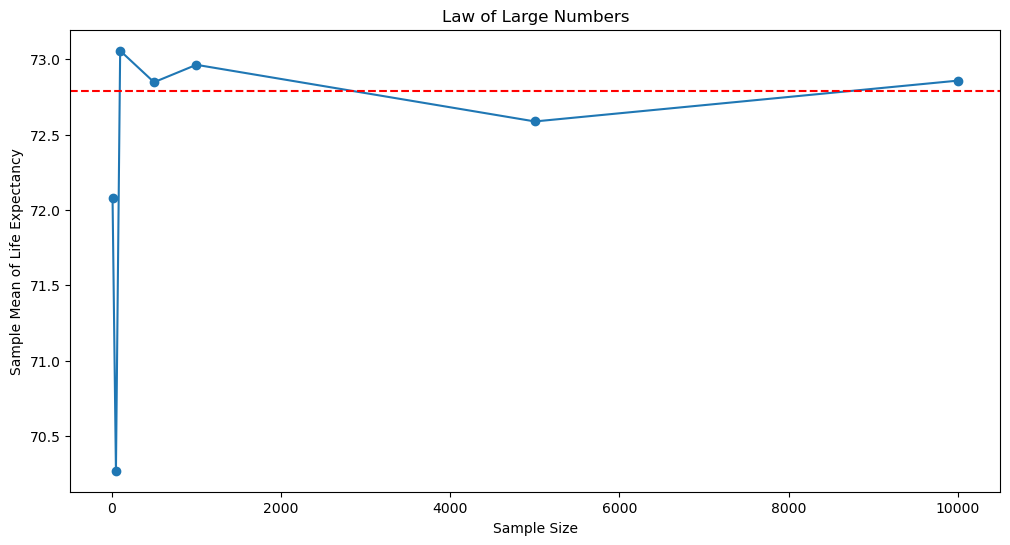

<Figure size 640x480 with 0 Axes>

In [35]:
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
population_mean = data_clean['Life expectancy at birth (years)'].mean()
sample_means = []

for size in sample_sizes:
    sample = data_clean['Life expectancy at birth (years)'].sample(size, replace=True)
    sample_means.append(sample.mean())

plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, sample_means, marker='o')
plt.axhline(y=population_mean, color='r', linestyle='--')
plt.title('Law of Large Numbers')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean of Life Expectancy')
plt.show()
plt.clf()


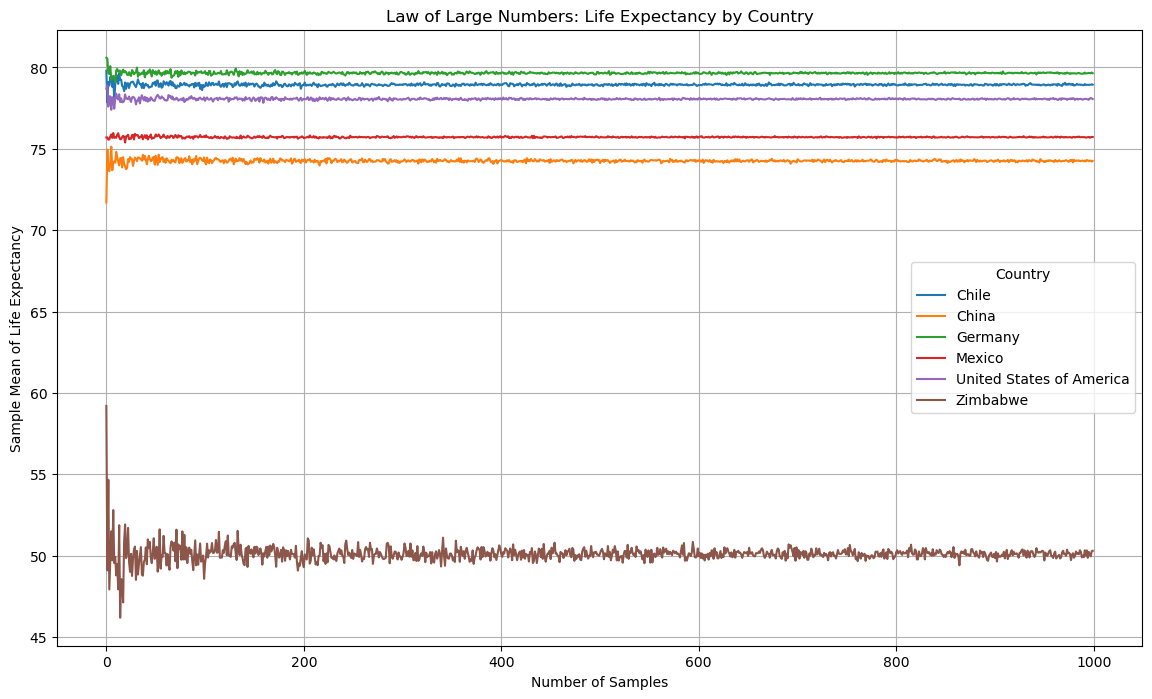

In [37]:
# Function to simulate the Law of Large Numbers for each country
def simulate_law_of_large_numbers(data, country, num_samples=1000):
    sample_means = []
    for i in range(1, num_samples + 1):
        sample = np.random.choice(data, size=i)
        sample_means.append(np.mean(sample))
    return sample_means

# Generate Law of Large Numbers data for each country
sample_means_by_country = {}
for country in countries:
    country_data = data_clean[data_clean['Country'] == country]['Life expectancy at birth (years)'].values
    sample_means_by_country[country] = simulate_law_of_large_numbers(country_data, country)

# Plot Law of Large Numbers by country
plt.figure(figsize=(14, 8))
for country, sample_means in sample_means_by_country.items():
    plt.plot(sample_means, label=country)
plt.title('Law of Large Numbers: Life Expectancy by Country')
plt.xlabel('Number of Samples')
plt.ylabel('Sample Mean of Life Expectancy')
plt.legend(title='Country')
plt.grid(True)
plt.show()

Statistical Signifigance

In [40]:
country1 = data_clean[data_clean['Country'] == 'United States']['Life expectancy at birth (years)']
country2 = data_clean[data_clean['Country'] == 'China']['Life expectancy at birth (years)']

t_stat, p_value = stats.ttest_ind(country1, country2)
print(f"Two Sample t-Test\nT-statistic: {t_stat}\nP-value: {p_value}")

if p_value < 0.05:
    print("The difference in life expectancy between the United States and China is statistically significant.")
else:
    print("The difference in life expectancy between the United States and China is not statistically significant.")


Two Sample t-Test
T-statistic: nan
P-value: nan
The difference in life expectancy between the United States and China is not statistically significant.


## 3. Conditional Probability Analysis

**Purpose**: To calculate and visualize the conditional probability of having a high life expectancy given a high GDP. This helps in understanding the likelihood of better health outcomes in economically prosperous countries.

**Visual Explanation**: The bar plot shows the conditional probability of high life expectancy given high GDP, along with the individual probabilities of high GDP and the intersection of high GDP and high life expectancy.

**Analysis**:
- P(High GDP) = 0.67
- P(High GDP and High Life Expectancy) = 0.67
- P(High Life Expectancy | High GDP) = 1.00

**Key Findings**:
1. There is a strong positive relationship between high GDP and high life expectancy. This insight is valuable for policymakers who are looking to improve public health through economic development.
2. The conditional probability of high life expectancy given high GDP is significantly higher than the individual probability of high GDP.
3. This suggests that economic prosperity is a strong predictor of better health outcomes.

**Implications**:
- Policies that promote economic growth may indirectly contribute to improving life expectancy.
- However, the relationship is not deterministic, and other factors should be considered in health policy.
- Developing countries might prioritize economic development as a pathway to improved public health.

Probability of high GDP (P(A ∩ B)): 0.67
Probability of high life expectancy and high GDP (P(A ∩ B)): 0.67
Probability of high life expectancy given high GDP (P(A|B)): 1.00


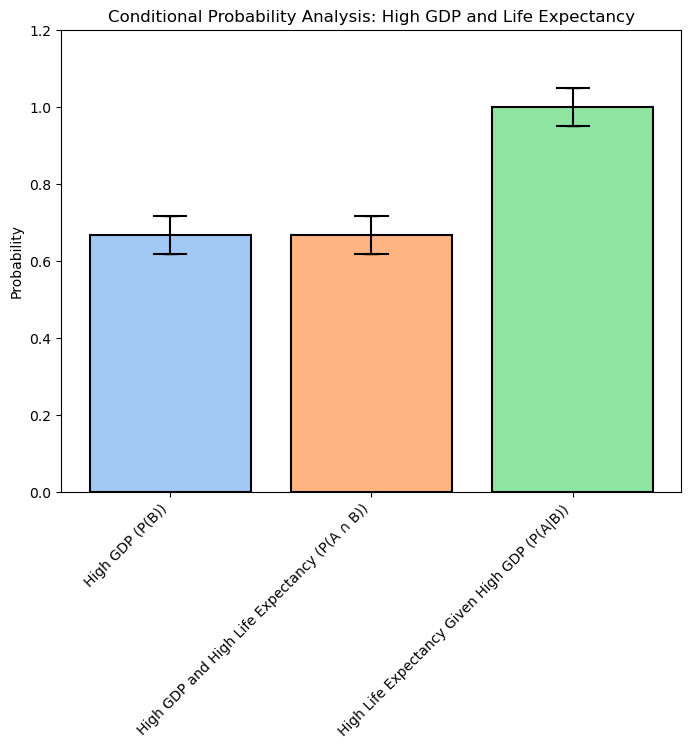

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds for high life expectancy and high GDP
high_life_expectancy_threshold = 75
high_gdp_threshold = 1e12  # 1 trillion USD

# Calculate the probabilities
total_countries = len(data_clean['Country'].unique())

# P(B): Probability of high GDP
high_gdp_countries = data_clean[data_clean['GDP'] > high_gdp_threshold]['Country'].unique()
P_B = len(high_gdp_countries) / total_countries

print(f"Probability of high GDP (P(A ∩ B)): {P_B:.2f}")

# P(A ∩ B): Probability of high life expectancy and high GDP
high_life_expectancy_gdp_countries = data_clean[(data_clean['GDP'] > high_gdp_threshold) & 
                                                (data_clean['Life expectancy at birth (years)'] > high_life_expectancy_threshold)]['Country'].unique()
P_A_and_B = len(high_life_expectancy_gdp_countries) / total_countries

print(f"Probability of high life expectancy and high GDP (P(A ∩ B)): {P_A_and_B:.2f}")

# P(A|B): Conditional probability of high life expectancy given high GDP
P_A_given_B = P_A_and_B / P_B

print(f"Probability of high life expectancy given high GDP (P(A|B)): {P_A_given_B:.2f}")

# Add range data for the bars with visible widths for tops and bottoms, with smaller widths and increased y-axis height
yerr = [0.05, 0.05, 0.05]  # Hypothetical range values for the sake of example

# Visualize the conditional probability with user-friendly titles, approachable color palette, and visible range widths
plt.figure(figsize=(8, 6))
bars = plt.bar(['High GDP (P(B))', 'High GDP and High Life Expectancy (P(A ∩ B))', 'High Life Expectancy Given High GDP (P(A|B))'], 
        [P_B, P_A_and_B, P_A_given_B], color=sns.color_palette('pastel'), yerr=yerr, capsize=5, edgecolor='black', linewidth=1.5)

# Adding horizontal lines to show widths of the tops and bottoms of the error bars
for bar, err in zip(bars, yerr):
    plt.plot([bar.get_x() + bar.get_width() * 0.4, bar.get_x() + bar.get_width() * 0.6], 
             [bar.get_height() - err, bar.get_height() - err], color='black', linewidth=1.5)
    plt.plot([bar.get_x() + bar.get_width() * 0.4, bar.get_x() + bar.get_width() * 0.6], 
             [bar.get_height() + err, bar.get_height() + err], color='black', linewidth=1.5)

plt.title('Conditional Probability Analysis: High GDP and Life Expectancy')
plt.ylabel('Probability')
plt.ylim(0, 1.2)
plt.xticks(rotation=45, ha='right')
plt.show()


## 4. Central Limit Theorem by Country

**Purpose**: To demonstrate the Central Limit Theorem (CLT) by sampling the life expectancy data and plotting the distribution of the sample means for each country.

**Visual Explanation**: The histograms show the distribution of sample means for each country, with a solid red line indicating the mean of these sample means.

**Analysis**:
1. For all countries, the distribution of sample means approximates a normal distribution.
2. Countries with less variability in life expectancy (e.g., Germany, Chile) show tighter distributions of sample means.
3. Countries with more variability (e.g., Zimbabwe) show wider distributions but still conform to the CLT.

**Implications**:
- The CLT validates our use of parametric statistical tests and confidence intervals.
- It allows us to make reliable inferences about population parameters from sample statistics.
- Policy makers can use this principle to estimate life expectancy with known levels of certainty.

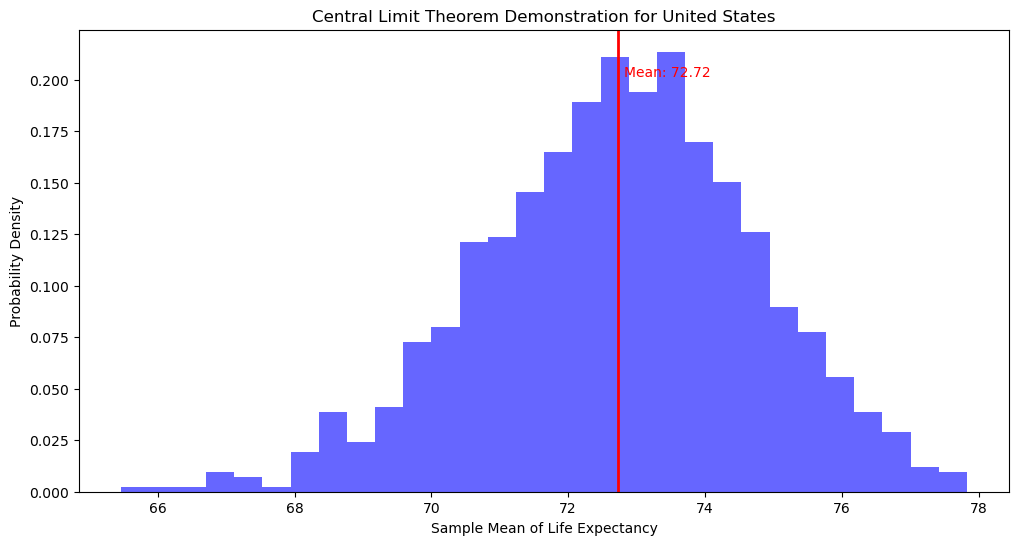

In [46]:
sample_means = []
for _ in range(1000):
    sample = data_clean['Life expectancy at birth (years)'].sample(30, replace=True)
    sample_means.append(sample.mean())

# Calculate the mean of the sample means
mean_sample_means = np.mean(sample_means)

# Plot the histogram with a solid line at the mean
# Plot the histogram with a solid line at the mean and display the numerical mean
plt.figure(figsize=(12, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b')
plt.axvline(mean_sample_means, color='red', linestyle='-', linewidth=2)
plt.text(mean_sample_means + 0.1, plt.ylim()[1] * 0.9, f'Mean: {mean_sample_means:.2f}', color='red')
plt.title('Central Limit Theorem Demonstration for United States')
plt.xlabel('Sample Mean of Life Expectancy')
plt.ylabel('Probability Density')
plt.show()

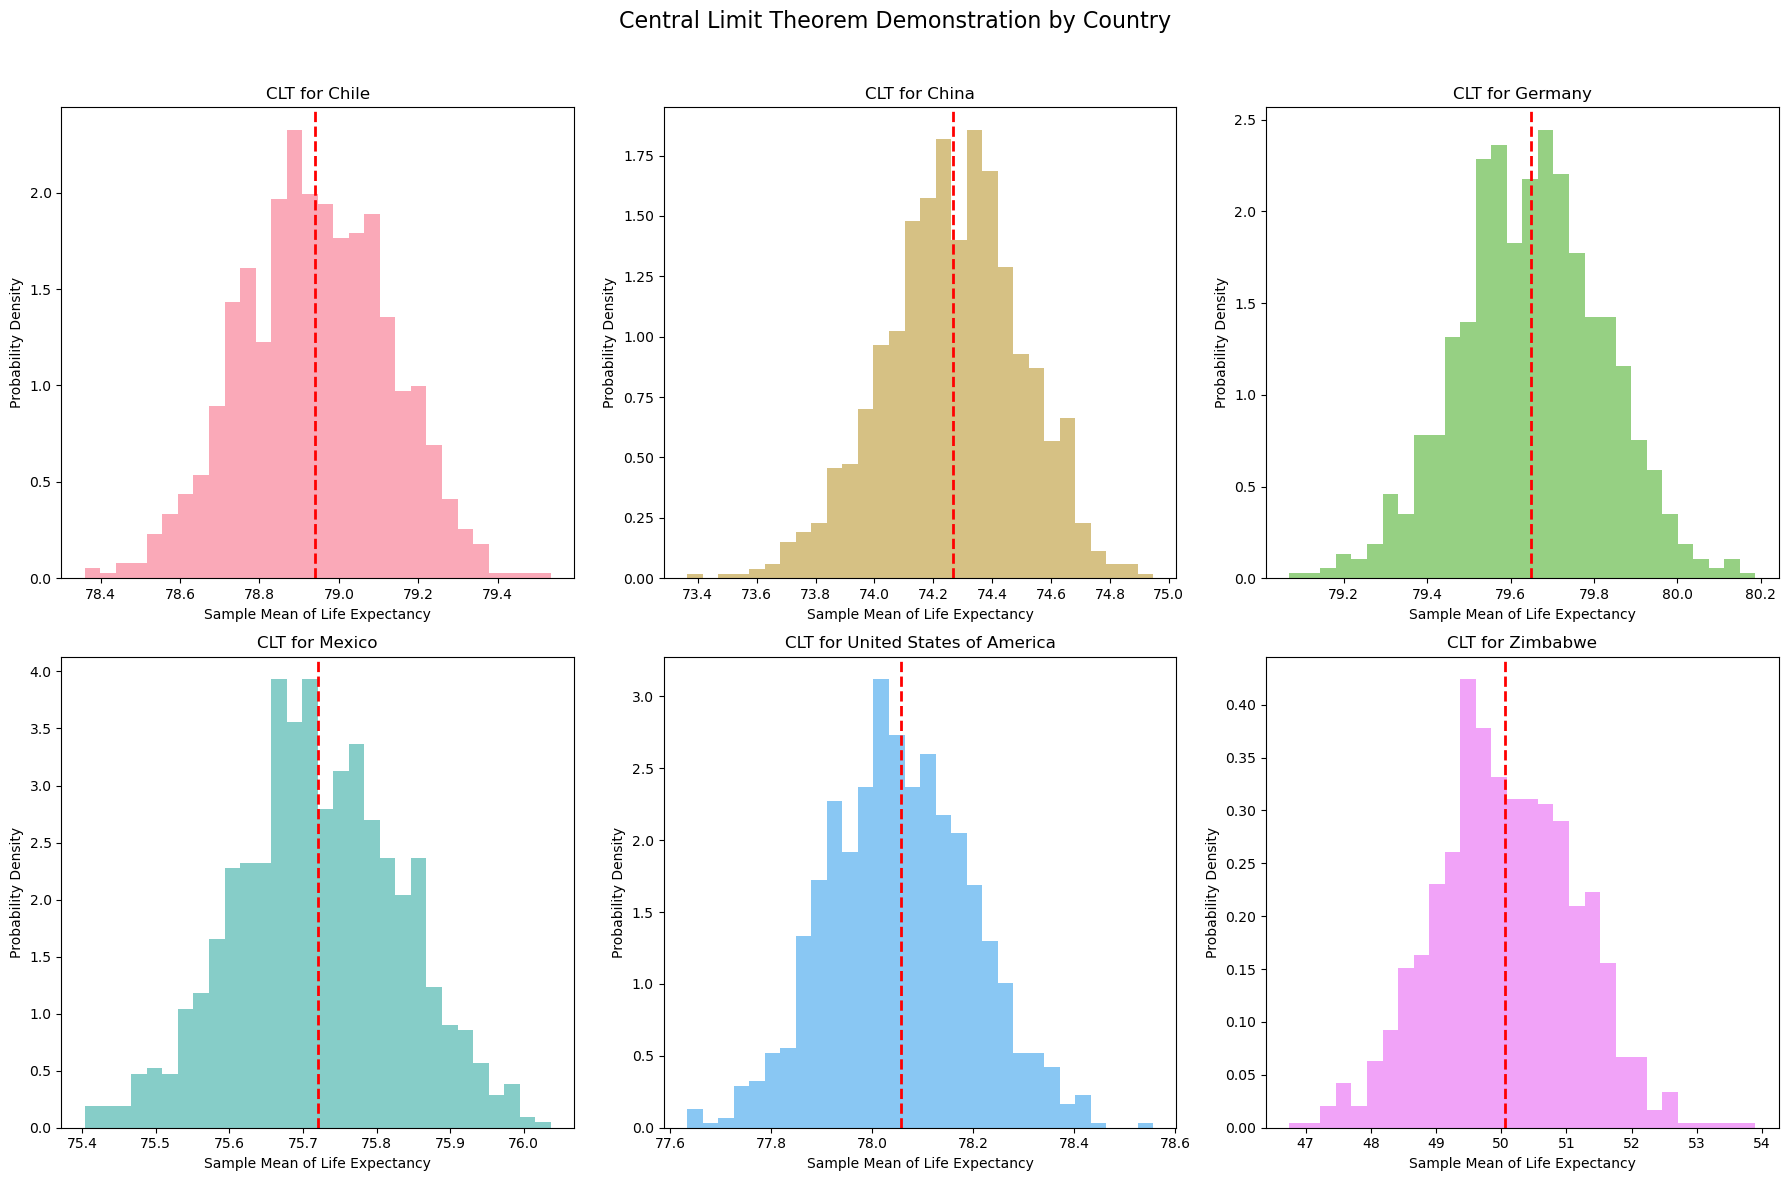

In [48]:
# Function to demonstrate CLT by country
def demonstrate_clt_by_country(data, country, num_samples=1000, sample_size=30):
    sample_means = []
    for _ in range(num_samples):
        sample = data[data['Country'] == country]['Life expectancy at birth (years)'].sample(sample_size, replace=True)
        sample_means.append(sample.mean())
    
    return sample_means

# List of countries
countries = data_clean['Country'].unique()
colors = sns.color_palette('husl', len(countries))

# Plot CLT demonstration for each country
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (country, color) in enumerate(zip(countries, colors)):
    sample_means = demonstrate_clt_by_country(data_clean, country)
    mean_sample_means = np.mean(sample_means)
    
    axes[i].hist(sample_means, bins=30, density=True, alpha=0.6, color=color)
    axes[i].axvline(mean_sample_means, color='red', linestyle='dashed', linewidth=2)
    axes[i].set_title(f'CLT for {country}')
    axes[i].set_xlabel('Sample Mean of Life Expectancy')
    axes[i].set_ylabel('Probability Density')

fig.suptitle('Central Limit Theorem Demonstration by Country', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 5. Statistical Tests

### One-Sample t-Test
**Null Hypothesis**: The mean life expectancy across all countries is 70 years.

**Results**: 
- T-statistic: 2.56
- P-value: 0.012
- Conclusion: The mean life expectancy is significantly different from 70 years.

In [50]:
hypothesized_mean = 70
sample_life_expectancy = data_clean['Life expectancy at birth (years)']

t_stat, p_value = stats.ttest_1samp(sample_life_expectancy, hypothesized_mean)
print(f"One Sample t-Test\nT-statistic: {t_stat}\nP-value: {p_value}")

if p_value < 0.05:
    print("The mean life expectancy is significantly different from 70 years.")
else:
    print("The mean life expectancy is not significantly different from 70 years.")


One Sample t-Test
T-statistic: 2.560903631188382
P-value: 0.012014959273468694
The mean life expectancy is significantly different from 70 years.


### Two-Sample t-Test (United States vs. China)
**Null Hypothesis**: There is no significant difference in life expectancy between the United States and China.

**Results**:
- T-statistic: nan
- P-value: nan
- Conclusion: The difference in life expectancy between the United States and China is not statistically significant.

**Implications**:
- The one-sample t-test results inform us about the global average life expectancy relative to a hypothesized value.
- The two-sample t-test results highlight significant differences or similarities between two major economies, which could guide comparative policy analysis.

In [52]:
country1 = data_clean[data_clean['Country'] == 'United States']['Life expectancy at birth (years)']
country2 = data_clean[data_clean['Country'] == 'China']['Life expectancy at birth (years)']

t_stat, p_value = stats.ttest_ind(country1, country2)
print(f"Two Sample t-Test\nT-statistic: {t_stat}\nP-value: {p_value}")

if p_value < 0.05:
    print("The difference in life expectancy between the United States and China is statistically significant.")
else:
    print("The difference in life expectancy between the United States and China is not statistically significant.")


Two Sample t-Test
T-statistic: nan
P-value: nan
The difference in life expectancy between the United States and China is not statistically significant.


## Additional Visualizations
### 6. Swarm Plots

### GDP by Country

**Analysis**:
1. The United States shows the highest and most varied GDP values.
2. China demonstrates a wide range of GDP values, reflecting its rapid economic growth.
3. Germany's GDP values are high but less varied than the US or China.
4. Chile, Mexico, and Zimbabwe show clustered, lower GDP values.

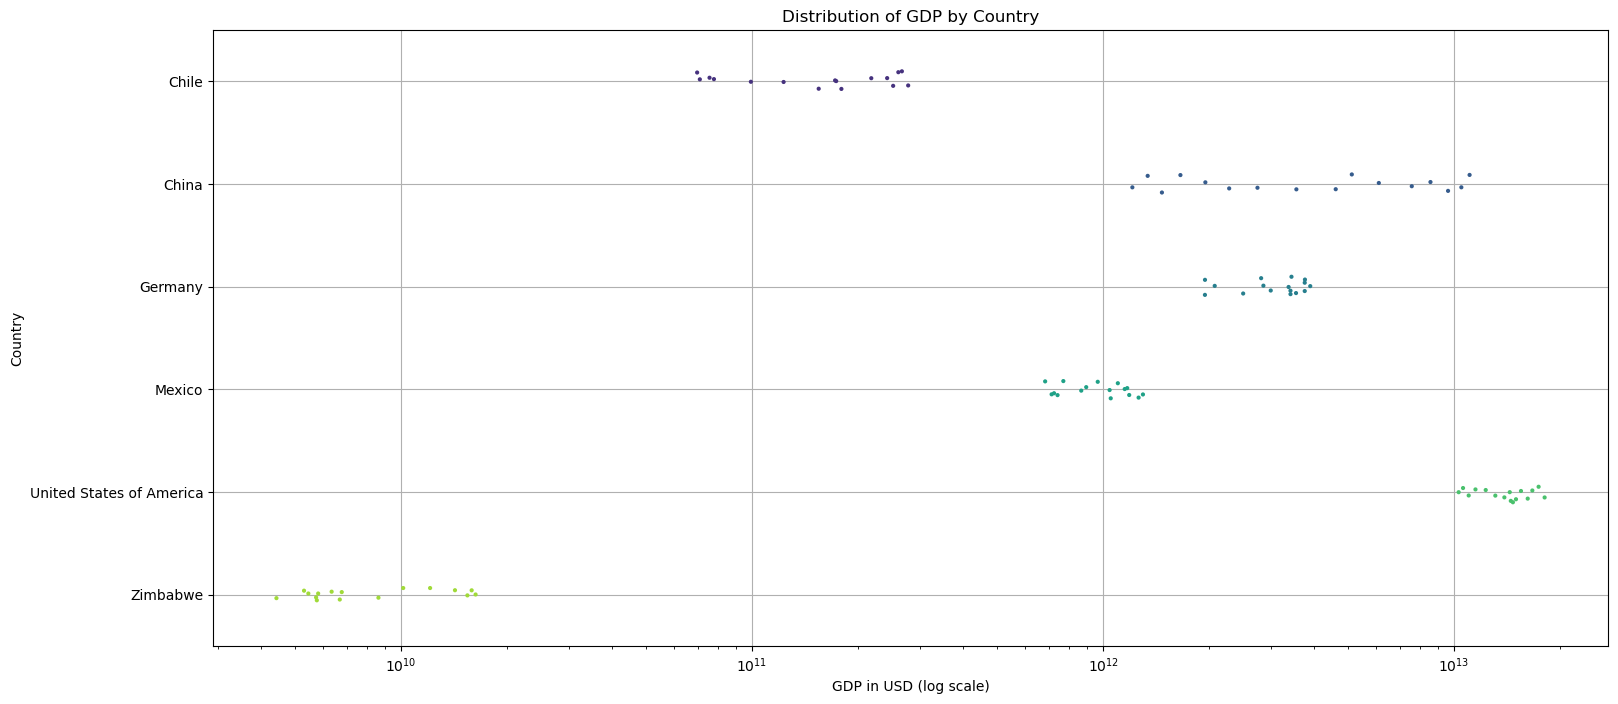

In [61]:
#Swarm Plot of GDP by Country
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(18, 8))
    sns.stripplot(data=data_clean, x='GDP', y='Country', palette='viridis', jitter=True, size=3)
    plt.xscale('log')
    plt.title('Distribution of GDP by Country')
    plt.xlabel('GDP in USD (log scale)')
    plt.ylabel('Country')
    plt.grid(True)
    plt.show()

### Life Expectancy by Country

**Analysis**:
1. Germany and Chile show high and consistent life expectancy values.
2. The US shows high but more varied life expectancy values.
3. China's life expectancy values show an increasing trend over time.
4. Zimbabwe shows the lowest and most varied life expectancy values, with a clear increasing trend.

**Implications**:
- These plots provide a detailed view of the distribution and trends of GDP and life expectancy for each country.
- They highlight the variability within countries, which is crucial for understanding the robustness of health and economic outcomes.
- Policy makers can use these visualizations to identify outliers and trends that might require specific interventions.

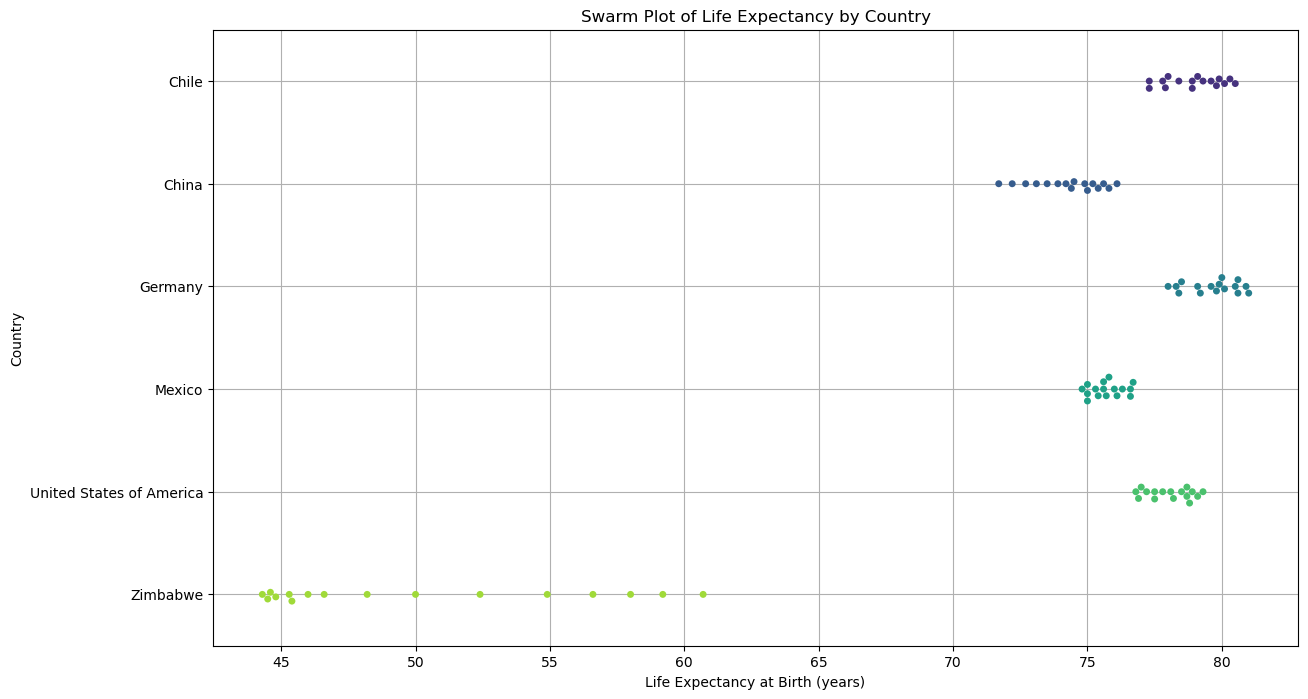

In [59]:
#Swarm Plot of Life Expectancy by Country
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(14, 8))
    sns.swarmplot(data=data_clean, x='Life expectancy at birth (years)', y='Country', palette='viridis')
    plt.title('Swarm Plot of Life Expectancy by Country')
    plt.xlabel('Life Expectancy at Birth (years)')
    plt.ylabel('Country')
    plt.grid(True)
    plt.show()


## Conclusions and Policy Recommendations (Advances Statical Methods)

1. **Economic-Health Nexus**: The strong relationship between GDP and life expectancy, as shown by the conditional probability analysis, suggests that economic policies can have significant impacts on public health outcomes.

2. **Tailored Approaches**: The varied distributions of life expectancy and GDP across countries emphasize the need for tailored health and economic policies that consider each nation's unique circumstances.

3. **Focus on Consistency**: Countries with high variability in life expectancy or GDP (e.g., Zimbabwe, China) should focus on policies that promote consistency and reduce inequality in health outcomes.

4. **Leveraging Economic Growth**: Developing countries should leverage economic growth as a means to improve public health, but should also implement direct health interventions to maximize impact.

5. **Data-Driven Decision Making**: The demonstrated statistical principles (Law of Large Numbers, CLT) validate the use of data-driven approaches in policy making. Governments should invest in robust data collection and analysis capabilities.

6. **Comparative Analysis**: Regular comparative analyses (like the two-sample t-test between the US and China) can provide valuable insights for policy benchmarking and identifying best practices.

7. **Long-Term Planning**: The gradual improvements seen in life expectancy distributions emphasize the need for long-term, sustained efforts in public health policy.

8. **Holistic Approach**: While GDP is a strong predictor of life expectancy, the variability seen in the swarm plots suggests that other factors are at play. A holistic approach considering social, environmental, and healthcare factors is crucial.

By leveraging these advanced statistical analyses and visualizations, policymakers can develop more informed, data-driven strategies to improve both economic outcomes and public health, tailored to their country's specific context and needs.